# Exploring the Laplacian for Spectral Analysis and Graph Partitioning 

L = D - A 

### Definitions to Calculate Laplacian, Eigenvalue+Eigenvectors, Partitions, Spectral Gap

In [27]:
#define a W matrix that gives the couplings
#these are the definitions in NetProp.py 
import numpy as np
from numpy import linalg as LA
import networkx as nx
import matplotlib.pyplot as plt

class Laplacian():
    def __init__(self,W):
        self.W = W
        self.nodes = len(W)
        
    def get_L(self):
        W = self.W
        A = self.calc_adj()
        D = self.get_D()
        Lin = D[0]-A
        Lout = D[1]-A
        Lboth = D[2]-A
        self.Lin = Lin
        self.Lout = Lout
        self.Lboth = Lboth
        return([Lin,Lout,Lboth])
    def calc_adj(self):
        W = self.W
        A = np.where(W>0, 1,0)
        self.A = A
        return A
    def get_D(self):
        A = self.A
        W = self.W
        D = []
        Din = np.zeros(len(A))
        Dout=np.zeros(len(A))
        Dboth=np.zeros(len(A))
        for i in range(len(A)):
            Din[i] = sum(A[i,:])
            Dout[i] = sum(A[:,i])
            if A[i,i]>0:
                Dboth[i] = Din[i]+Dout[i]-1
            else:
                Dboth[i] = Din[i]+Dout[i]
        D.append(np.diag(Din))
        D.append(np.diag(Dout))
        D.append(np.diag(Dboth))
        self.Din = Din
        self.Dout = Dout
        self.Dboth = Dboth
        return(D)

    def get_eigen(self): # modified from laplacian partition from Netprop.py
            #using just Lboth for now
            Lin,Lout, Lboth = self.get_L()
            val, vec = LA.eig(Lin) #Lboth in Netprop.py
            #print(Lin)
            self.val = val
            self.vec = vec
            return val,vec

    def partition(self,part):
        part1 = []
        part2 = []
        for i in range(len(part)):
            if part[i]>0: 
                part1.append(i)
            else:
                part2.append(i)
        return([part1,part2])

    def laplacian_partition(self): #adapted from Netprop.py
        W = self.W
        val,vec = self.get_eigen()
        part = vec[np.where(val==np.sort(val)[1])]
        part1,part2 = self.partition(part[0])
        self.part1 = part1
        self.part2 = part2
        return([part1,part2]) #returns list of two lists (one for each group)
        #should it be return([part1,part2])


    def plot_partition(self): #adapted from Netprop.py #need to check this definition
        W = self.W
        parts = self.laplacian_partition()
        side = int(len(W)**0.5)
        Limg = np.zeros(shape = side**2)
        for p in parts[0]:
            Limg[p] = 0
        for p in parts[1]:
            Limg[p] = 255
        Limg = np.reshape(Limg,(side,side))
        Limg = np.repeat(Limg[:,:,np.newaxis],repeats = 3,axis = 2)
        Limg = Limg.astype('uint8')
        plt.imshow(Limg)
        #plt.savefig('{}/LaplacianPartioning_epoch{}_image{}_{}'.format(save_dir,epoch,image_num,trial_type))
        frame = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
        plt.title('Paritions')
    
    def plot_graph(self):
        G = nx.MultiDiGraph()
        W = self.W
        for i in range(len(W)):
            for j in range(len(W)):
            #print(i,j)
                if W[i,j]!= 0: 
                    G.add_weighted_edges_from([(i, j, W[i,j])])
        nx.drawing.nx_pylab.draw_networkx(G)
        plt.show()

    def plot_eigenvalues(self):
        val,vec = self.get_eigen()
        plt.plot(np.sort(val),'o')
        plt.ylabel('Eigenvalue')
        plt.title('Eigenvalues')
        plt.xticks(range(self.nodes))

### Before Beginning: Drawing with Networkx

-> Useful visualization tool

-> need to check the innerworkings of how it draws - will draw it slightly differently each time

### Part 1: Demo from TowardsDataScience Article
link: https://towardsdatascience.com/spectral-clustering-aba2640c0d5b

##### Recreate Eigenvalues of Graph Laplacian

![Figure 1](eigenvalues_of_graph_laplacian.png)


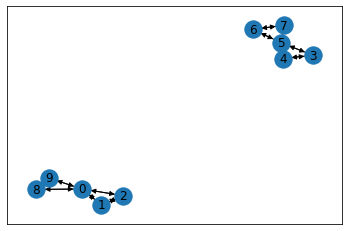

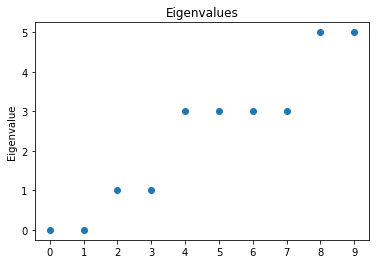

In [26]:
A = np.array([
  [0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
  [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
  [0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
  [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [1, 0, 0, 0, 0, 0, 0, 0, 1, 0]])
L = Laplacian(A)
L.plot_graph()
L.plot_eigenvalues()

### Part 2: Bipartate Graph Constructed from Second Smallest Eigenvalue

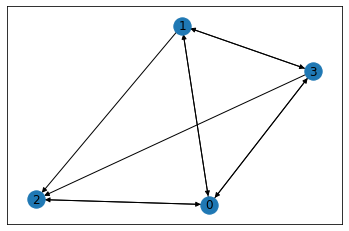

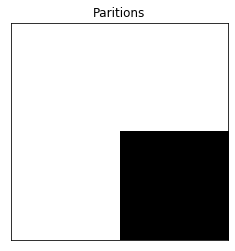

In [28]:
coupling_matrix = np.array([[0,1,3,5],[2,4,5,2],[1,0,0,0],[1,1,1,1]])
#coupling_matrix = np.array([[0,0,0,1],[1,0,0,0],[1,0,0,0],[1,1,1,1]])
L = Laplacian(coupling_matrix)
L.plot_graph()
L.plot_partition()
#black is one partition, white another.

### Part 3: Using the Largest Spectral Gap 